# Analysis

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [274]:
df = pd.read_csv(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\data\processed\processed_raw_data.csv')
df = df[(df['Days_to_Fly']>1)]
df = df[(df['flight_duration_value'] > 4.4)]
df = df[(df['flight_duration_value'] < 12)]
df = df[~(df['carrier'].isin(['Third Party', 'Frontier', 'Sun Country Airlines']))]
df = df[df['price']<1000]
df

,Unnamed: 0,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price
0,0,Spirit,Rounds Trip,EWR - LAX,Nonstop,89,18,06:45,6.5,Not_Holiday,4,211.0
1,1,Alaska,Rounds Trip,EWR - LAX,Nonstop,89,18,07:30,6.3,Not_Holiday,4,297.0
2,2,JetBlue,Rounds Trip,EWR - LAX,Nonstop,89,18,05:15,6.2,Not_Holiday,4,298.0
3,3,United,Rounds Trip,EWR - LAX,Nonstop,89,18,12:00,6.4,Not_Holiday,4,302.0
7,7,United,Rounds Trip,EWR - LAX,Nonstop,89,18,07:00,6.2,Not_Holiday,4,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...
138978,140441,Alaska,One Way,LAX - EWR,Nonstop,0,89,10:15,5.6,Holiday,4,259.0
138979,140442,JetBlue,One Way,LAX - EWR,Nonstop,0,89,11:15,5.5,Holiday,4,259.0
138980,140443,Delta,One Way,LAX - JFK,Nonstop,0,89,06:00,5.6,Holiday,4,274.0
138981,140444,Delta,One Way,LAX - JFK,Nonstop,0,89,09:15,5.9,Holiday,4,274.0


In [275]:
df.loc[df['Airport_Route'].str.startswith('LAX -'),'From_City'] = 'Los Angeles'
df.loc[df['Airport_Route'].str.startswith('LAX -'),'To_City'] = 'New York'
df.loc[~df['Airport_Route'].str.startswith('LAX -'),'From_City'] = 'New York'
df.loc[~df['Airport_Route'].str.startswith('LAX -'),'To_City'] = 'Los Angeles'
df['City_Route'] = df['From_City'] + ' - ' + df['To_City']
df.head()

,Unnamed: 0,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price,From_City,To_City,City_Route
0,0,Spirit,Rounds Trip,EWR - LAX,Nonstop,89,18,06:45,6.5,Not_Holiday,4,211.0,New York,Los Angeles,New York - Los Angeles
1,1,Alaska,Rounds Trip,EWR - LAX,Nonstop,89,18,07:30,6.3,Not_Holiday,4,297.0,New York,Los Angeles,New York - Los Angeles
2,2,JetBlue,Rounds Trip,EWR - LAX,Nonstop,89,18,05:15,6.2,Not_Holiday,4,298.0,New York,Los Angeles,New York - Los Angeles
3,3,United,Rounds Trip,EWR - LAX,Nonstop,89,18,12:00,6.4,Not_Holiday,4,302.0,New York,Los Angeles,New York - Los Angeles
7,7,United,Rounds Trip,EWR - LAX,Nonstop,89,18,07:00,6.2,Not_Holiday,4,309.0,New York,Los Angeles,New York - Los Angeles


In [276]:
df.sort_values(['flight_duration_value'])

,Unnamed: 0,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price,From_City,To_City,City_Route
49272,49461,Spirit,One Way,EWR - LAX,1 stop,0,61,22:15,4.7,Not_Holiday,7,277.0,New York,Los Angeles,New York - Los Angeles
49984,50178,Spirit,One Way,EWR - LAX,1 stop,0,75,22:15,4.7,Not_Holiday,7,288.0,New York,Los Angeles,New York - Los Angeles
76157,76698,United,One Way,LAX - EWR,Nonstop,0,5,23:30,4.9,Not_Holiday,6,476.0,Los Angeles,New York,Los Angeles - New York
58734,59036,United,Rounds Trip,LAX - EWR,Nonstop,15,8,23:30,4.9,Not_Holiday,6,621.0,Los Angeles,New York,Los Angeles - New York
58732,59034,United,Rounds Trip,LAX - EWR,Nonstop,15,8,13:00,4.9,Not_Holiday,6,621.0,Los Angeles,New York,Los Angeles - New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96162,96805,JetBlue,One Way,LGA - LAX,1 stop,0,76,13:45,11.9,Not_Holiday,4,125.0,New York,Los Angeles,New York - Los Angeles
39586,39658,Spirit,One Way,LGA - LAX,1 stop,0,66,13:00,11.9,Not_Holiday,3,98.0,New York,Los Angeles,New York - Los Angeles
39899,39992,Spirit,One Way,LGA - LAX,1 stop,0,65,13:00,11.9,Not_Holiday,2,95.0,New York,Los Angeles,New York - Los Angeles
39984,40077,Spirit,One Way,LGA - LAX,1 stop,0,58,13:00,11.9,Not_Holiday,2,95.0,New York,Los Angeles,New York - Los Angeles


In [277]:
df = df[~((df['stop']=='1 stop') & (df['flight_duration_value']==4.7))].sort_values('flight_duration_value')
df

,Unnamed: 0,carrier,Trip_Type,Airport_Route,stop,round_trip_duration,Days_to_Fly,from_hour,flight_duration_value,Holiday,Fly_WeekDay,price,From_City,To_City,City_Route
68327,68745,United,Rounds Trip,LAX - EWR,Nonstop,56,4,14:45,4.9,Not_Holiday,4,470.0,Los Angeles,New York,Los Angeles - New York
24998,25007,United,One Way,LAX - EWR,Nonstop,0,12,14:45,4.9,Not_Holiday,2,230.0,Los Angeles,New York,Los Angeles - New York
4216,4216,United,One Way,LAX - EWR,Nonstop,0,13,14:45,4.9,Not_Holiday,6,469.0,Los Angeles,New York,Los Angeles - New York
2234,2234,United,Rounds Trip,LAX - EWR,Nonstop,4,7,14:45,4.9,Not_Holiday,7,913.0,Los Angeles,New York,Los Angeles - New York
14869,14872,United,One Way,LAX - EWR,Nonstop,0,6,14:45,4.9,Not_Holiday,1,430.0,Los Angeles,New York,Los Angeles - New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96162,96805,JetBlue,One Way,LGA - LAX,1 stop,0,76,13:45,11.9,Not_Holiday,4,125.0,New York,Los Angeles,New York - Los Angeles
39586,39658,Spirit,One Way,LGA - LAX,1 stop,0,66,13:00,11.9,Not_Holiday,3,98.0,New York,Los Angeles,New York - Los Angeles
39899,39992,Spirit,One Way,LGA - LAX,1 stop,0,65,13:00,11.9,Not_Holiday,2,95.0,New York,Los Angeles,New York - Los Angeles
39984,40077,Spirit,One Way,LGA - LAX,1 stop,0,58,13:00,11.9,Not_Holiday,2,95.0,New York,Los Angeles,New York - Los Angeles


# Minimum Flight Duration

In [ ]:
plt.figure(figsize=(25, 8))

plt.subplot(1,2,1)
carrier_counts = df['carrier'].value_counts()
ordered_carriers = carrier_counts.index

ax = sns.barplot(x=df['carrier'], y=df['price'], hue=df['City_Route'], order=ordered_carriers, estimator=np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# plt.show()

plt.subplot(1,2,2)
bx = sns.boxplot(x=df['carrier'], y=df['price'], hue=df['City_Route'],order=ordered_carriers)
bx.set_xticklabels(bx.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\price_by_carrier.png') 

C:\Users\anshu\AppData\Local\Temp\ipykernel_23912\405942486.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\anshu\AppData\Local\Temp\ipykernel_23912\405942486.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


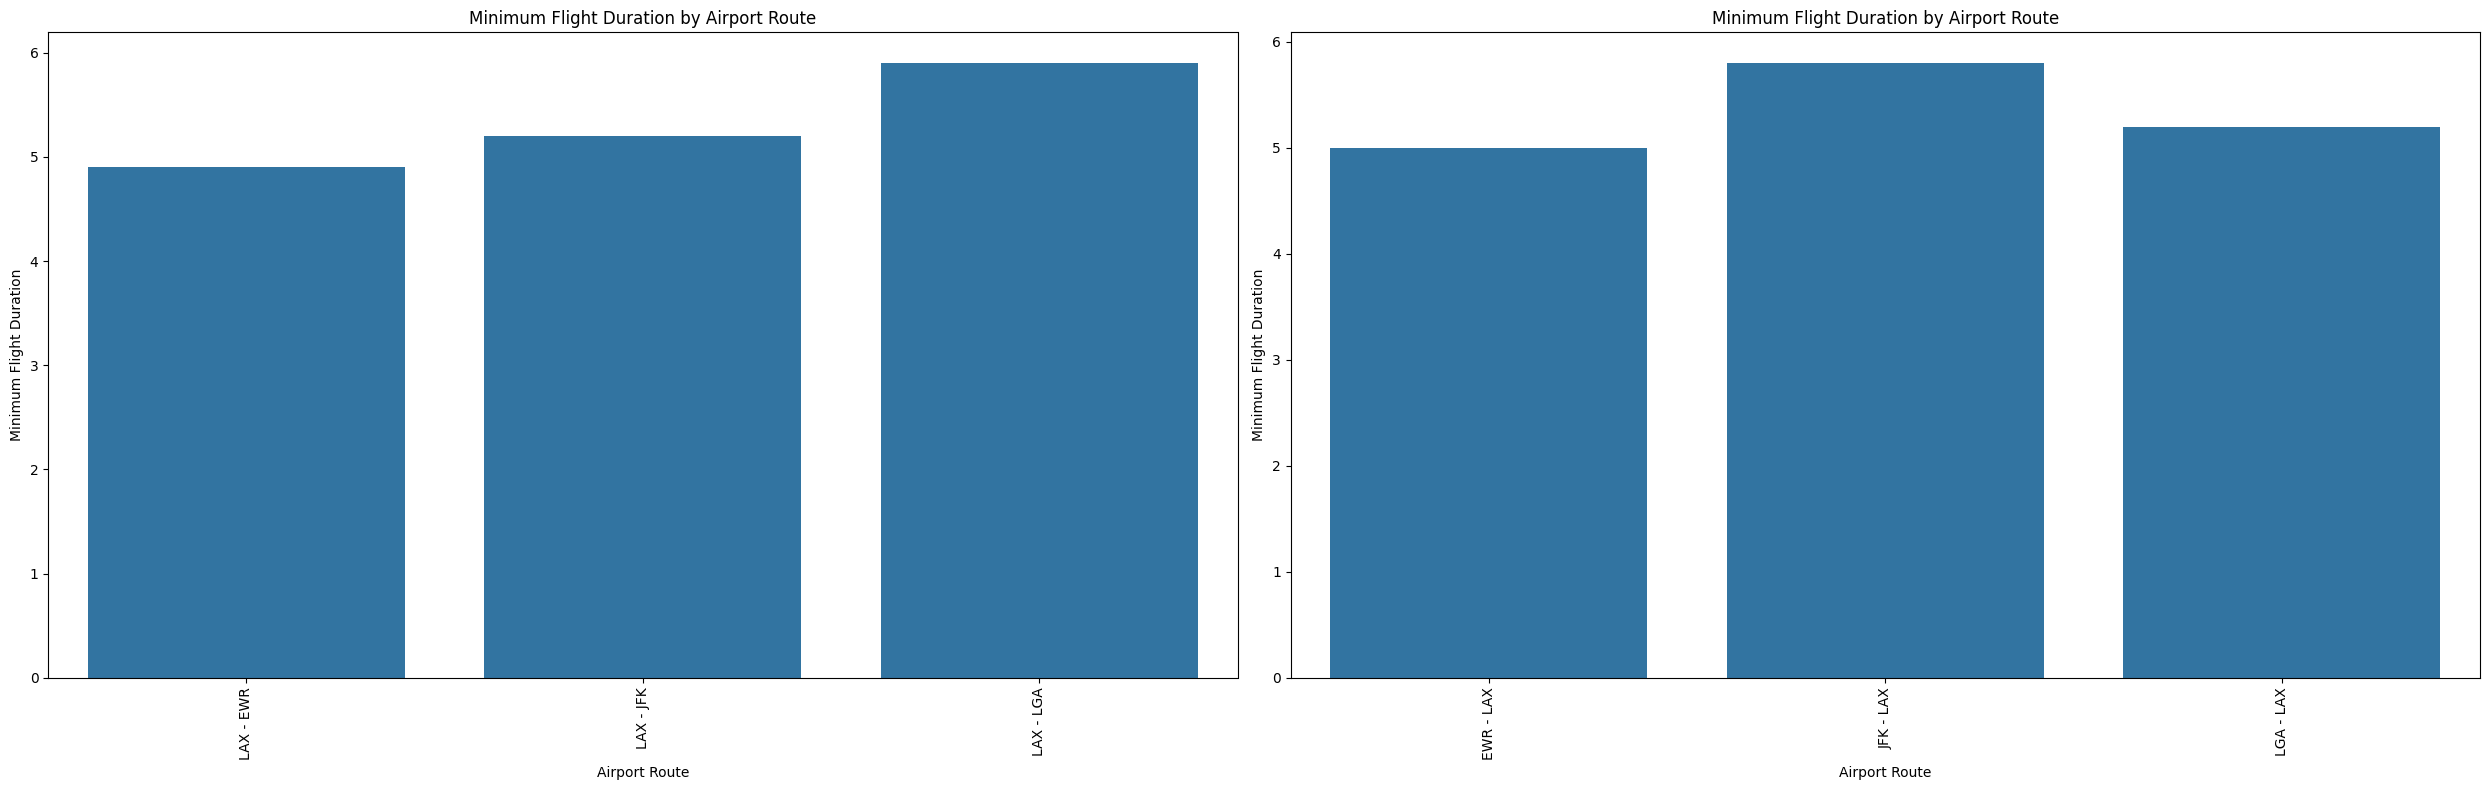

In [291]:
plt.figure(figsize=(25, 8))

plt.subplot(1,2,1)
min_flight_duration = df[df['From_City']=='Los Angeles'].groupby('Airport_Route')['flight_duration_value'].min().reset_index()
ax = sns.barplot(x='Airport_Route', y='flight_duration_value', data=min_flight_duration, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Minimum Flight Duration by Airport Route')
plt.xlabel('Airport Route')
plt.ylabel('Minimum Flight Duration')

plt.subplot(1,2,2)
min_flight_duration = df[df['From_City']=='New York'].groupby('Airport_Route')['flight_duration_value'].min().reset_index()
ax = sns.barplot(x='Airport_Route', y='flight_duration_value', data=min_flight_duration, palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Minimum Flight Duration by Airport Route')
plt.xlabel('Airport Route')
plt.ylabel('Minimum Flight Duration')

plt.tight_layout()

Save the plot
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\min_flight_duration.png')

# Show the plot
plt.show()

# Price vs Days_to_Fly vs Trip_Type

C:\Users\anshu\AppData\Local\Temp\ipykernel_23912\1890332708.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


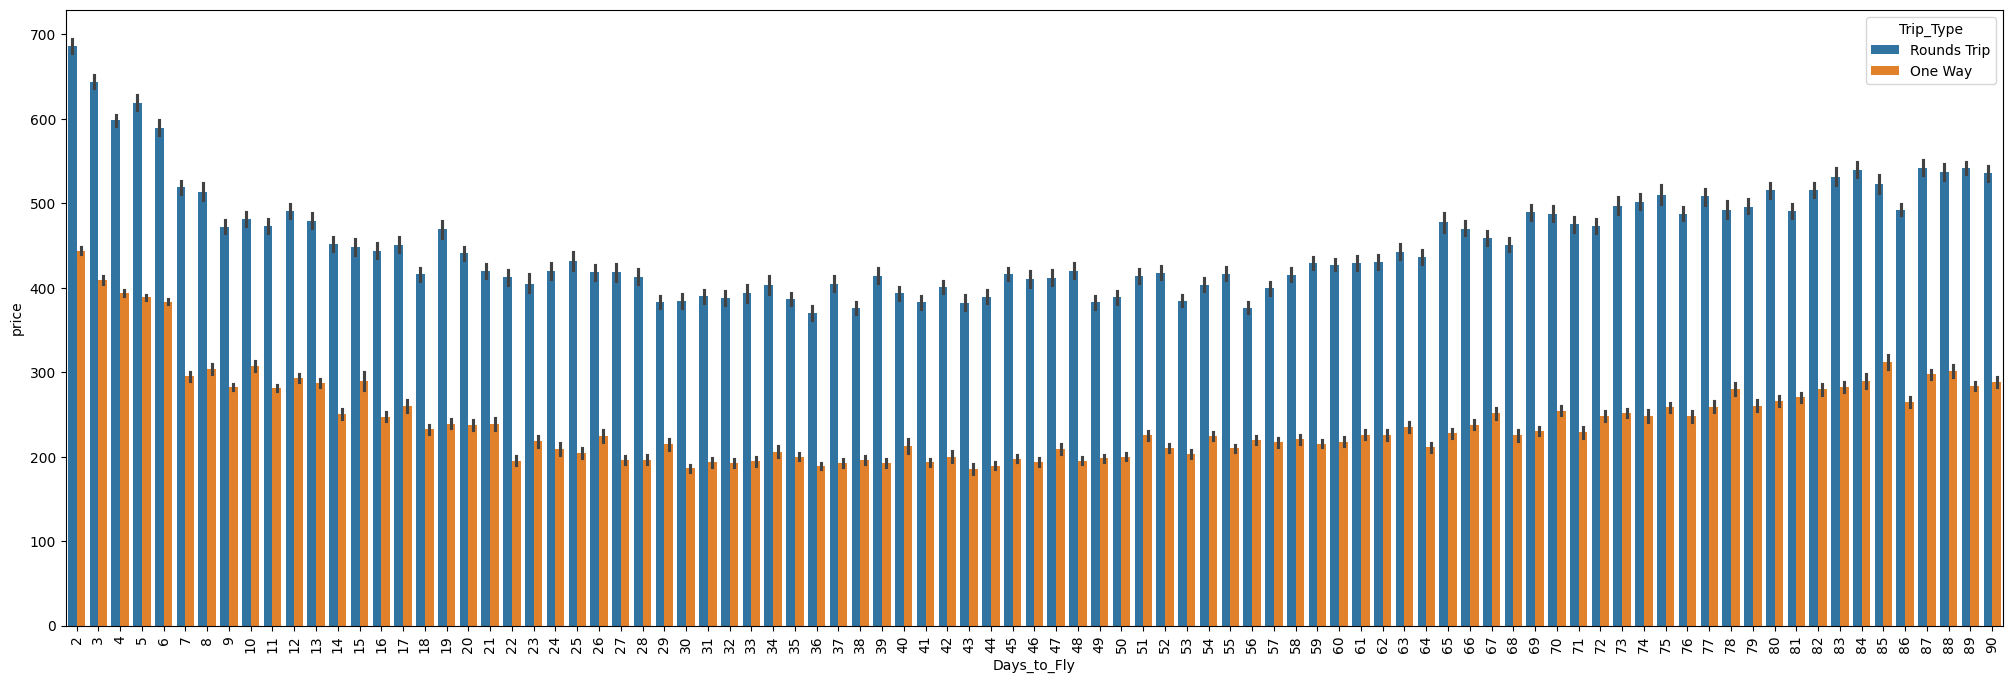

In [279]:
plt.figure(figsize=(25, 8))
ax = sns.barplot(x=df['Days_to_Fly'], y=df['price'], hue=df['Trip_Type'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\days_to_fly_vs_price.png', bbox_inches='tight')
plt.show()

# Average price by carrier by Route

C:\Users\anshu\AppData\Local\Temp\ipykernel_23912\1084766842.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
C:\Users\anshu\AppData\Local\Temp\ipykernel_23912\1084766842.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bx.set_xticklabels(bx.get_xticklabels(), rotation=90)


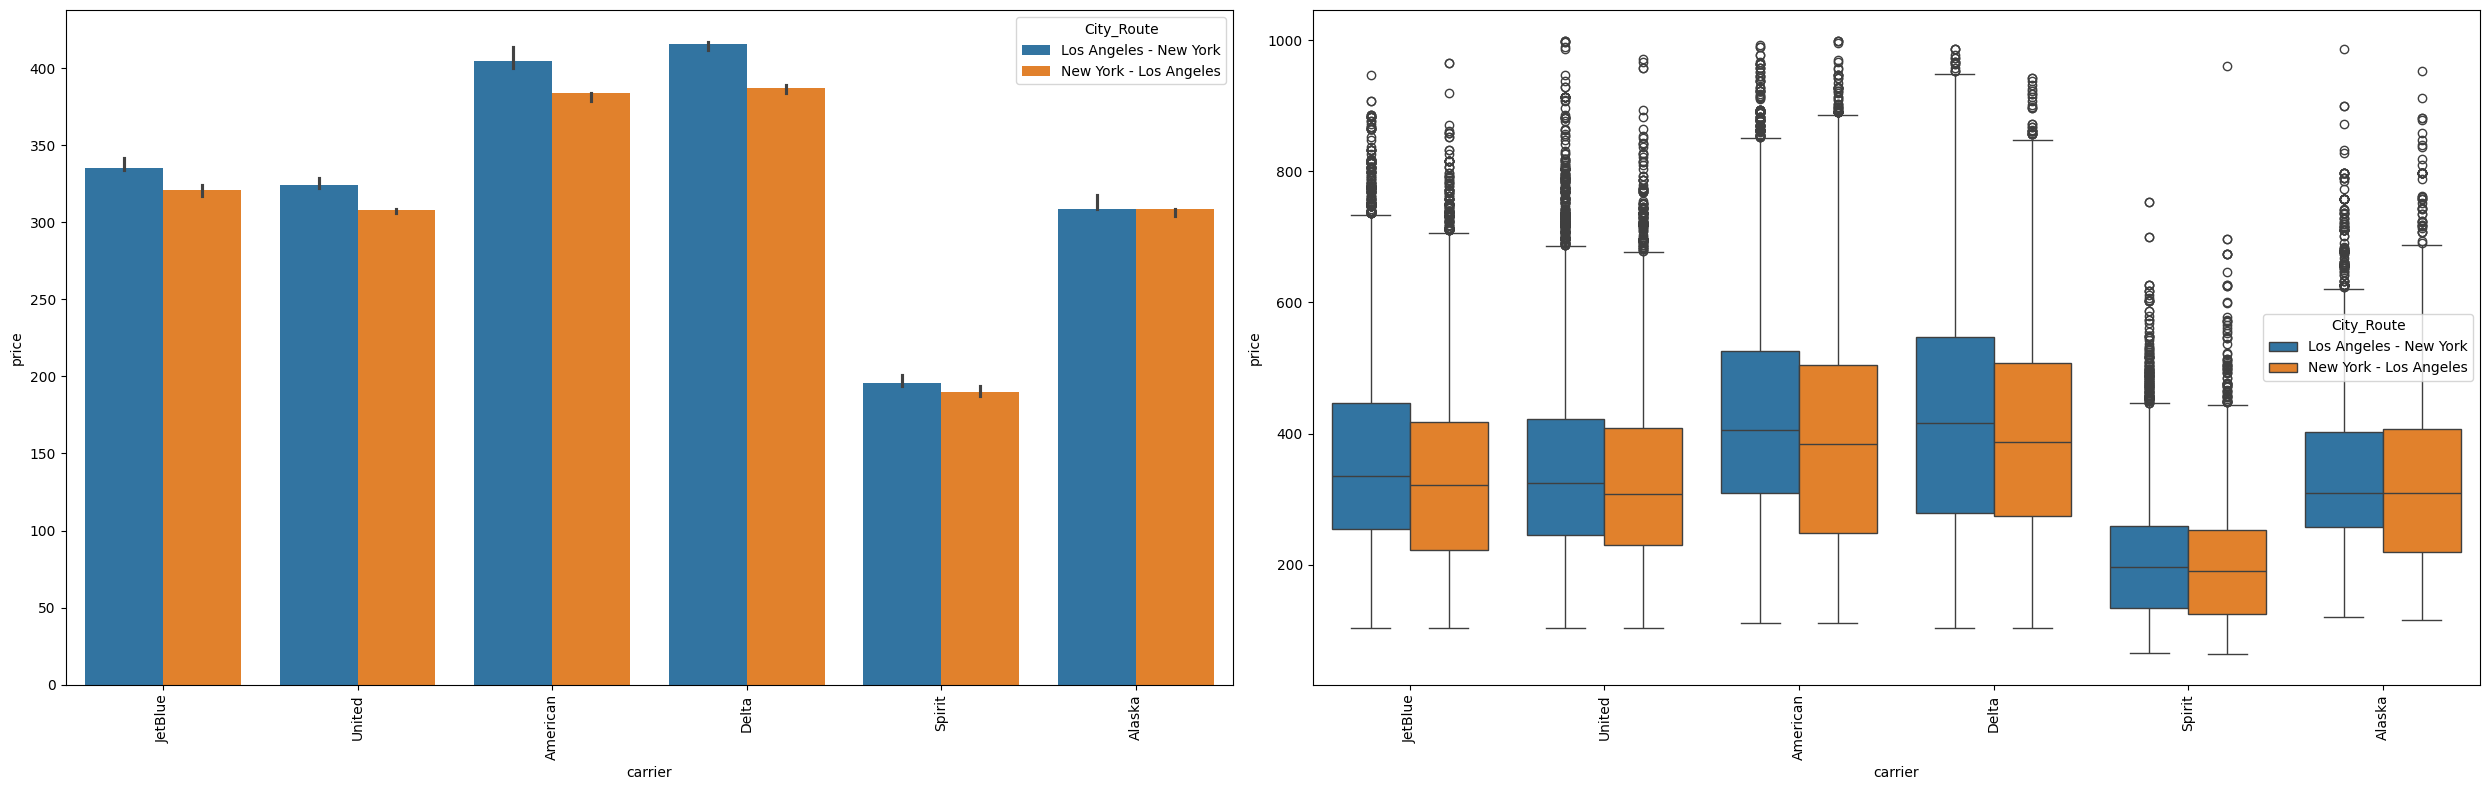

In [280]:
plt.figure(figsize=(25, 8))

plt.subplot(1,2,1)
carrier_counts = df['carrier'].value_counts()
ordered_carriers = carrier_counts.index

ax = sns.barplot(x=df['carrier'], y=df['price'], hue=df['City_Route'], order=ordered_carriers, estimator=np.median)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# plt.show()

plt.subplot(1,2,2)
bx = sns.boxplot(x=df['carrier'], y=df['price'], hue=df['City_Route'],order=ordered_carriers)
bx.set_xticklabels(bx.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\price_by_carrier.png') 

# Price vs Round Trip Duration

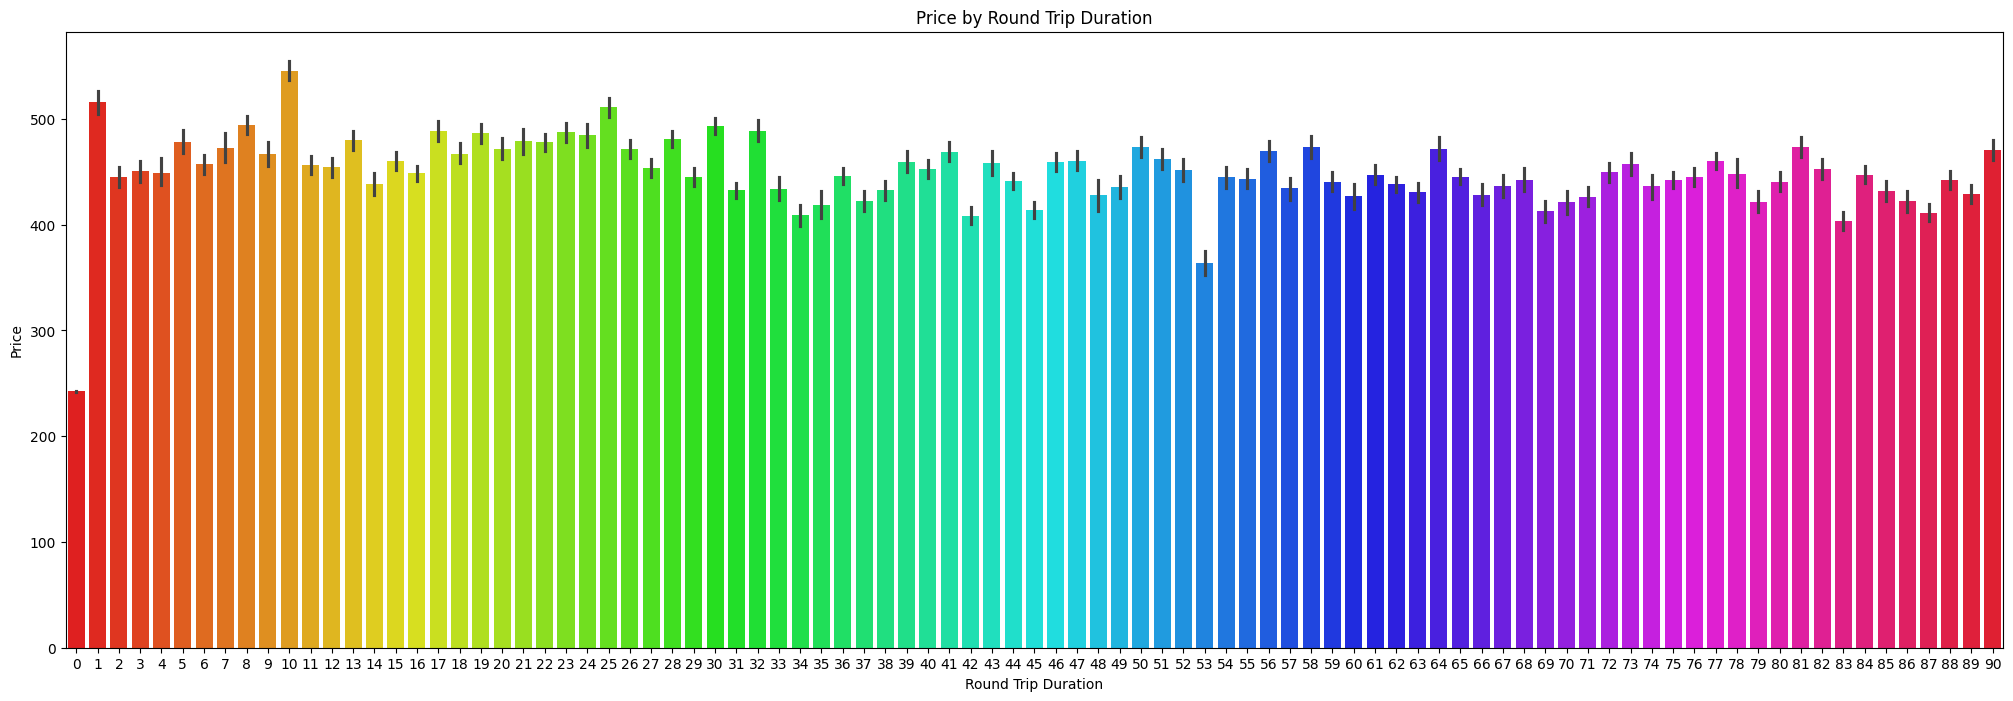

In [281]:
plt.figure(figsize=(25, 8))
sns.barplot(x='round_trip_duration', y='price', hue='round_trip_duration', palette='hsv', data=df)

plt.title('Price by Round Trip Duration')
plt.xlabel('Round Trip Duration')
plt.ylabel('Price')
plt.legend([], frameon=False)
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\price_by_round_trip_duration.png') 
plt.show()

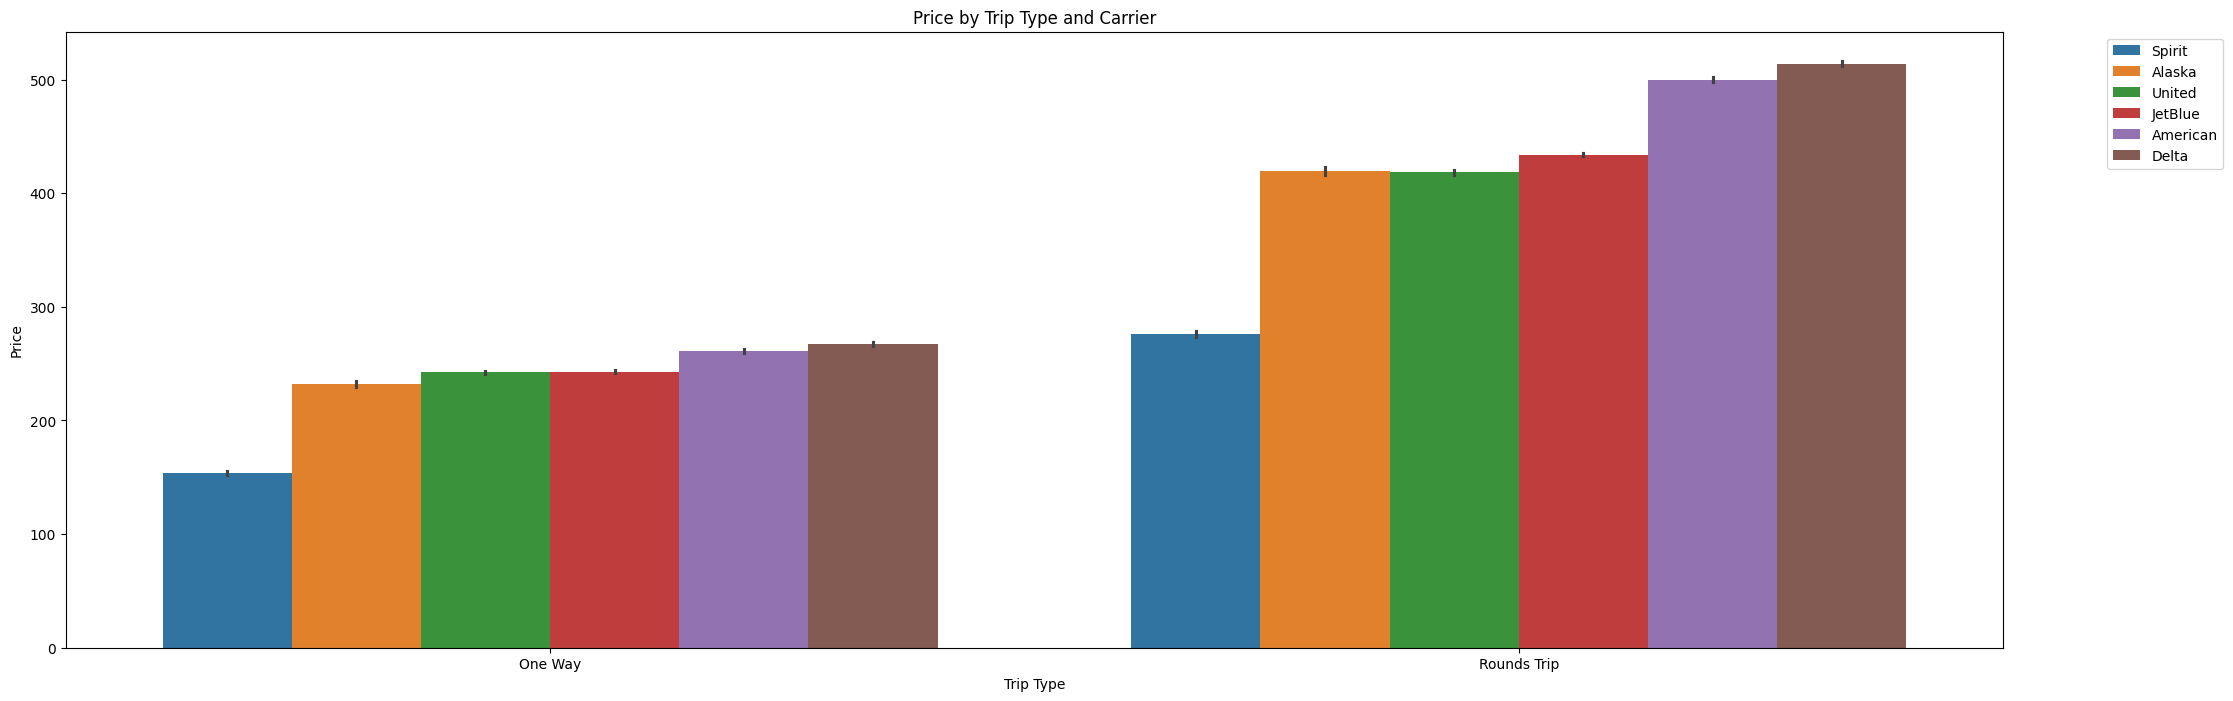

In [292]:
# Calculate average price per carrier
avg_price_per_carrier = df.groupby('carrier')['price'].mean().sort_values()

# Sort dataframe by carrier average price
df_sorted = df.set_index('carrier').loc[avg_price_per_carrier.index].reset_index()

plt.figure(figsize=(25, 8))
sns.barplot(x='Trip_Type', y='price', hue='carrier', data=df_sorted)

plt.title('Price by Trip Type and Carrier')
plt.xlabel('Trip Type')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\price_by_trip_type.png') 
plt.show()

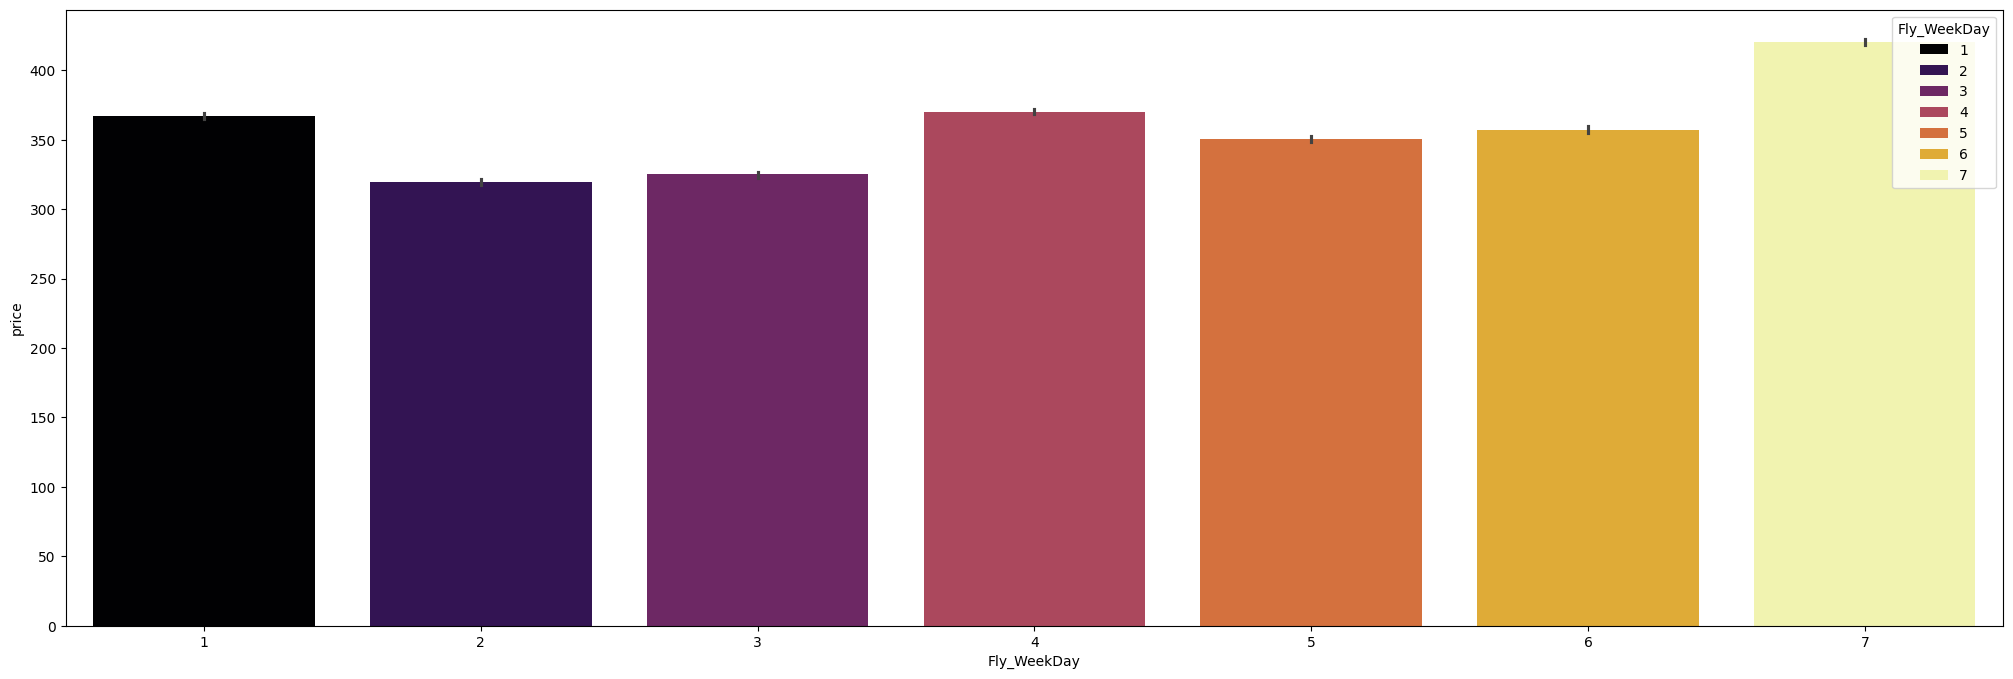

In [293]:
plt.figure(figsize=(25, 8))
sns.barplot(x='Fly_WeekDay', y='price', hue='Fly_WeekDay', data=df, palette='inferno')
plt.savefig(r'C:\Users\anshu\Desktop\MLOps\Flight-MLOps-Project\Flight-MLOps-Project\src\visualization\analytics_plots\price_by_weekday.png')